In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')

df.columns = ["Parents","Has_nurs","Form","Children","Housing","Finance","Social","Health","Class"]
print(df.head(5))
    

  Parents Has_nurs      Form Children     Housing     Finance         Social  \
0   usual   proper  complete        1  convenient  convenient        nonprob   
1   usual   proper  complete        1  convenient  convenient        nonprob   
2   usual   proper  complete        1  convenient  convenient  slightly_prob   
3   usual   proper  complete        1  convenient  convenient  slightly_prob   
4   usual   proper  complete        1  convenient  convenient  slightly_prob   

        Health      Class  
0     priority   priority  
1    not_recom  not_recom  
2  recommended  recommend  
3     priority   priority  
4    not_recom  not_recom  


In [3]:
df1 = df.copy()

In [4]:

#print(df1["Form"].value_counts())
df1 = pd.get_dummies(df1, columns=["Parents","Has_nurs","Form","Children","Housing","Finance","Social","Health"],drop_first=True)


In [11]:
import random
sam = []
for i in range(10):
    sam.append(df1.sample(frac = 0.2,replace = False))
print(sam)

    

[           Class  Parents_pretentious  Parents_usual  Has_nurs_improper  \
6503    priority                    1              0                  1   
9454   not_recom                    0              0                  0   
2708    priority                    0              1                  0   
4075   not_recom                    0              1                  0   
6554    priority                    1              0                  1   
...          ...                  ...            ...                ...   
7144   not_recom                    1              0                  0   
6779    priority                    1              0                  1   
4598  very_recom                    1              0                  0   
1317    priority                    0              1                  0   
6283   not_recom                    1              0                  1   

      Has_nurs_less_proper  Has_nurs_proper  Has_nurs_very_crit  \
6503                     0     

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
k = ['rbf','poly','sigmoid','linear']
#acc1 = []
all_acc = []
best = []
nue = []
k1 = []
bestAll = -9999
bestAccLst = []
for i in range(10):
    df2 = pd.DataFrame(sam[i])
    Y = df2["Class"]
    X = df2.drop(["Class"],axis = 1)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.3,random_state= 42)
    best_acc = -9999
    best_k = ''
    best_nue = 0
    acclst = []
    for j in range(1000):
        nue1 = random.uniform(0,0.1)
        ind=random.randint(0,3)
        k11 = k[ind]
        try:
            svm_model = NuSVC(nu= nue1,kernel= k11)
            svm_model.fit(X_train,Y_train)
            pre = svm_model.predict(X_test)
            acc = accuracy_score(pre,Y_test) 
            acclst.append(acc)
            if(acc > best_acc):
                best_acc = acc
                best_k = k11
                best_nue = nue1
        except:
            j=j-1
    if bestAll < best_acc :
        bestAll = best_acc
        bestAccLst = acclst
    best.append(best_acc)
    nue.append(best_nue)
    k1.append(best_k)
print(best)
print(nue)
print(k1)
print(bestAccLst)

[0.9910025706940874, 0.987146529562982, 0.9884318766066839, 0.9884318766066839, 0.9884318766066839, 0.987146529562982, 0.9910025706940874, 0.993573264781491, 0.9832904884318766, 0.980719794344473]
[0.0020479048534217115, 0.06661082748537782, 0.06903324451839521, 0.003355835309404065, 0.013724653483940964, 0.0005785867968919445, 0.001997237341138669, 0.004510709277210323, 0.003238599288277333, 0.010155295139609756]
['rbf', 'rbf', 'rbf', 'poly', 'poly', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf']
[0.9845758354755784, 0.9922879177377892, 0.9910025706940874, 0.5976863753213367, 0.9897172236503856, 0.9897172236503856, 0.04884318766066838, 0.9048843187660668, 0.5269922879177378, 0.5359897172236504, 0.9897172236503856, 0.9897172236503856, 0.08354755784061697, 0.987146529562982, 0.9910025706940874, 0.9845758354755784, 0.9845758354755784, 0.5925449871465296, 0.9845758354755784, 0.20179948586118251, 0.9858611825192802, 0.5437017994858612, 0.9910025706940874, 0.9832904884318766, 0.9897172236503856, 0.9845

In [17]:
Samples = ["Sample1","Sample2","Sample3","Sample4","Sample5","Sample6","Sample7","Sample8","Sample9","Sample10"]
new_df = pd.DataFrame({"Samples":Samples,"Best_Accuracy":best,"Best_nue":nue,"Best_Kernel":k1})

print(new_df)

    Samples  Best_Accuracy  Best_nue Best_Kernel
0   Sample1       0.991003  0.002048         rbf
1   Sample2       0.987147  0.066611         rbf
2   Sample3       0.988432  0.069033         rbf
3   Sample4       0.988432  0.003356        poly
4   Sample5       0.988432  0.013725        poly
5   Sample6       0.987147  0.000579         rbf
6   Sample7       0.991003  0.001997         rbf
7   Sample8       0.993573  0.004511         rbf
8   Sample9       0.983290  0.003239         rbf
9  Sample10       0.980720  0.010155         rbf


     Iterations  Accuracy
0             1  0.984576
1             2  0.992288
2             3  0.991003
3             4  0.597686
4             5  0.989717
..          ...       ...
995         996  0.032134
996         997  0.863753
997         998  0.582262
998         999  0.983290
999        1000  0.011568

[1000 rows x 2 columns]


<AxesSubplot:xlabel='Iterations'>

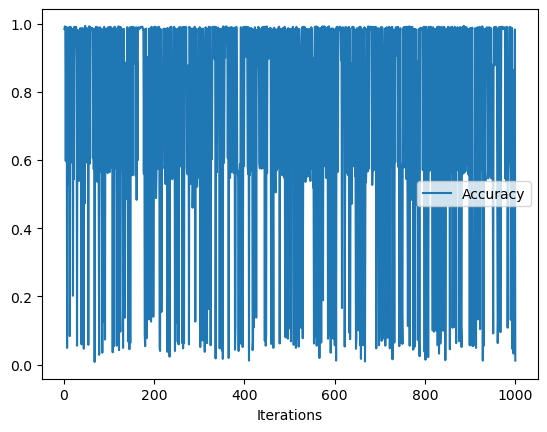

In [38]:
import matplotlib.pyplot as plt
Iter = list(range(1,1001))
dff = pd.DataFrame({"Iterations":Iter,"Accuracy":bestAccLst})
print(dff)

dff.plot(x = "Iterations",y = "Accuracy")
